# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('C:\\Users\\Tayo Adeyo\\Downloads\\foodhub_order.csv')
# returns the first 5 rows
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# No of rows and columns contained in the dataset
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the dataset

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* All the colums have the same number of observations - 1898, which tend to suggest that we dont have any missing entry.

* The "restaurant_name", "cuisine_type", and the "day_of_the_week" columns are categorical variables and are being correctly read as object types.

* The "food_preparation_time" and "delivery_time" are numerical variables and are being read as integers

* The "cost_of_the_order" is also a numerical variable and is being read as a float

* The "order_id" and the "customer_id" are being read in as integers, but these are categorical variables and should be object types, but we'll leave the type as it is.

* The rating is being wrongly read in as an object type. This is a numerical variable that should be read in as an integer. This suggests that there must be something wrong with some of the entries in this column. There is the need for further investigation of this column.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Find the different unique entries in the "rating" column
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [6]:
# How many observations in the "rating" column has the entry as "Not given"
(df.rating=="Not given").value_counts()

False    1162
True      736
Name: rating, dtype: int64

In [7]:
# Replace the "Not given" entries in the "rating" column with NaN
df['rating'] = df['rating'].replace(['Not given'],np.nan)
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week rating  food_preparation_time  \
0              30.75         Weekend    NaN                     25   
1              12.08         Weekend    NaN                     25   
2              12.23         Weekday      5                     23   
3              29.20         Weekend      3                     25   
4              11.59         Weekday      4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [9]:
# changing the data type of the "rating" column to type Int64
df['rating'] = df['rating'].astype('Int64')
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0              30.75         Weekend    <NA>                     25   
1              12.08         Weekend    <NA>                     25   
2              12.23         Weekday       5                     23   
3              29.20         Weekend       3                     25   
4              11.59         Weekday       4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   Int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: Int64(1), float64(1), int64(4), object(3)
memory usage: 135.4+ KB


#### Observations:
* There are no missing entries in the dataset provided as each column contains 1898 non-null values

* There is nevertheless something amiss with the "rating" column since the data type is of the wrong type.

* On close observation, we find many, (736 in all) were not given any rating, hence the data type - object

* These entries were changed to "NaN", and the data type converted to 'Int64'

* The "rating" column now reflects the fact that only 1162 of the entries have non null values, while 736 of the entries now have null values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# Statistical summary of the dataset
df.describe(include='all').T

count unique          top  freq       mean       std  \
order_id              1898.00    NaN          NaN   NaN 1477495.50    548.05   
customer_id           1898.00    NaN          NaN   NaN  171168.48 113698.14   
restaurant_name          1898    178  Shake Shack   219        NaN       NaN   
cuisine_type             1898     14     American   584        NaN       NaN   
cost_of_the_order     1898.00    NaN          NaN   NaN      16.50      7.48   
day_of_the_week          1898      2      Weekend  1351        NaN       NaN   
rating                1162.00    NaN          NaN   NaN       4.34      0.74   
food_preparation_time 1898.00    NaN          NaN   NaN      27.37      4.63   
delivery_time         1898.00    NaN          NaN   NaN      24.16      4.97   

                             min        25%        50%        75%        max  
order_id              1476547.00 1477021.25 1477495.50 1477969.75 1478444.00  
customer_id              1311.00   77787.75  128600.00  270525.00  405334.00  
restaurant_name              NaN        NaN        NaN        NaN        NaN  
cuisine_type                 NaN        NaN        NaN        NaN        NaN  
cost_of_the_order           4.47      12.08      14.14      22.30      35.41  
day_of_the_week              NaN        NaN        NaN        NaN        NaN  
rating                      3.00       4.00       5.00       5.00       5.00  
food_preparation_time      20.00      23.00      27.00      31.00      35.00  
delivery_time              15.00      20.00      25.00      28.00      33.00

#### Observations:
* It takes a minimum of 20 minutes and a maximum of 35 minutes for the food to be prepared after the order is placed.

* It takes about 27.37 minutes on the average to prepare the food after placing an order. It also takes about 24.16 minutes on the average to deliver the food after preparation.

* It takes a minimum of 15 minutes and a maximum of 33 minutes for the food to be delivered after preparation.

* Shake Shack is the most patronised out of the 178 restaurant in the dataset with a total order of 219 out of the 1898 orders placed and delivered.

* there are more orders on weekends than weekdays, 1351 out of the total 1898 orders.

* American." cuisine is the most favoured among the 14 different cuisine types being responible for a whopping 584 of the orders for food placed.

* Whenever a rating is given, the minimum rating received by any order is 3 and the maximum is 5 with more than a third (736 out of 1898) of the deliveries made not receiving any rating at all.

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# Display the number of null entries in the "rating" column (ratings with "Not given" entries has been changed to Null in Q3)
df.rating.isnull().sum()

736

#### Observations:
736 out of 1898 orders were not rated. Ratings with "Not given" entries has been replaced with Null entries.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

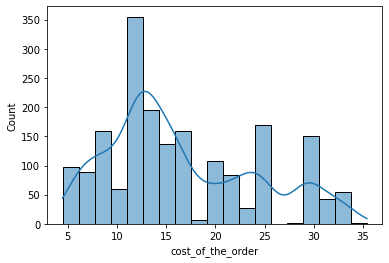

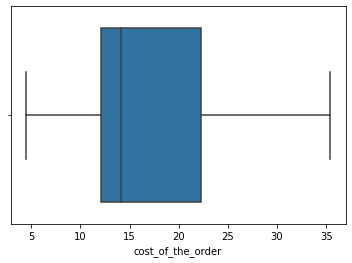

In [13]:
sns.histplot(data=df, x='cost_of_the_order', kde=True);
plt.show()
sns.boxplot(data=df, x='cost_of_the_order');
plt.show()

#### Observations:
* There are no outliers in the cost_of_the_order

* 50% of the orders placed cost less than $15

* The distribution is right skewed

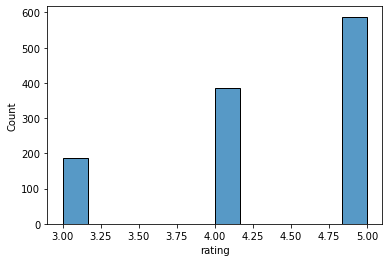

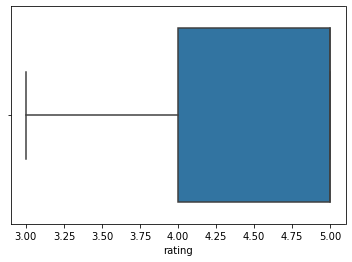

In [14]:
sns.histplot(data=df, x='rating');
plt.show()
sns.boxplot(data=df, x='rating');
plt.show()

#### Observations:
* 50% (median) of the orders placed and delivered (when rated) were giving the maximum rating of 5 

* The distribution is left skewed

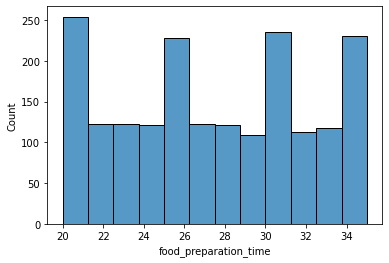

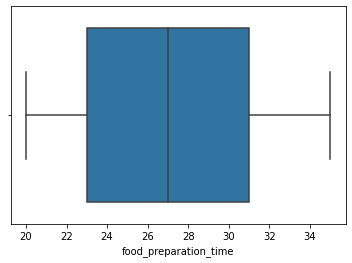

In [15]:
sns.histplot(data=df, x='food_preparation_time');
plt.show()
sns.boxplot(data=df, x='food_preparation_time');
plt.show()

#### Observations:
* There are no outliers

* It takes a minimum of 20 minutes and a maximum of 35 minutes to prepare any type of cuisine ordered with roughly about 27 minutes being the average time for food preparation.

* The distribution is normal


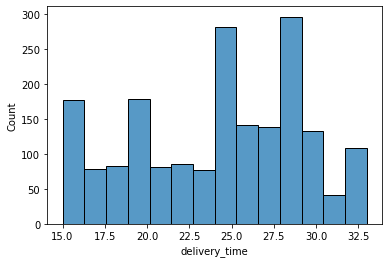

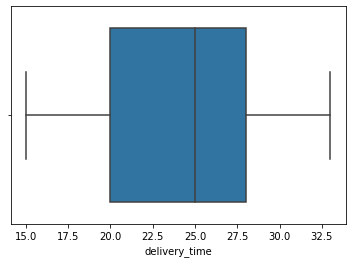

In [16]:
sns.histplot(data=df, x='delivery_time');
plt.show()
sns.boxplot(data=df, x='delivery_time');
plt.show()

#### Observations:

* There are no outliers
* 50% of the orders for food are delivered 25 minutes after preparation
* The distribution is slightly left skewed


In [17]:
# Find the number of unique occurences of order_id
df.order_id.nunique()

1898

#### Observations:
Even though order_id is of type integer, it is actually a categorical variable and not a numerical variable. there are 1898 unique order_id attached to each order placed and delivered.

In [18]:
# Find the number of customers that has patronised FoodHub
df.customer_id.nunique()

1200

#### Observations:
Customer_id is also a categorical variable reprenting every unique customer that has utilized the services of FoodHub at one time or the other. There are 1200 unique customers in the dataset

In [19]:
# Find the number of restaurant utilizing the services of FoodHub
df.restaurant_name.nunique()

178

In [20]:
his = px.histogram(df, x="restaurant_name")
his.show()

#### Observations:
There are 178 different restaurants being serviced by FoodHub with Shake Shack enjoying the most patronage from the registered customers followed by The Meatball Shop and Blue Ribbon Sushi.

In [21]:
# Find the different cuisine types catered for by the restaaurants
df.cuisine_type.nunique()

14

In [22]:
his = px.histogram(df, x="cuisine_type")
his.show()

#### Observations:
There are 14 different cuisine types being catered by the different restaurants. From the graphical display, the American cuisine seems to be the most requested for cuisine type followed by japanese and Chinese cuisines. Bringing up the rear in the order of prefereed cuisines is Vietnamese cuisine, closely followed by Spanish and Korean cuisines.

In [23]:
# Find unique days of the week
df['day_of_the_week'].nunique()

2

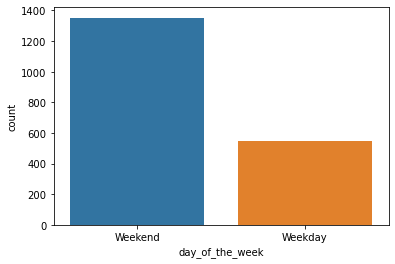

In [24]:
sns.countplot(data=df, x='day_of_the_week');

#### Observations:
There are two unique days of the week. Weekdays and weekends

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
df['restaurant_name'].value_counts().iloc[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The Shake Shack restaurant services the highest number of orders at 219 orders. The Meatball Shop and Blue Ribbon Shushi comes a distant second and third with 132 and 119 orders respectively. Blue Ribbon Fried Chicken and Parm is no 4 and 5 with 96 and 68 orders respectively.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
# To find the most popular cuisine on weekends
df[df['day_of_the_week']=='Weekend'].cuisine_type.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [27]:
df[df['day_of_the_week']=='Weekend'].cuisine_type.value_counts().iloc[:1]

American    415
Name: cuisine_type, dtype: int64

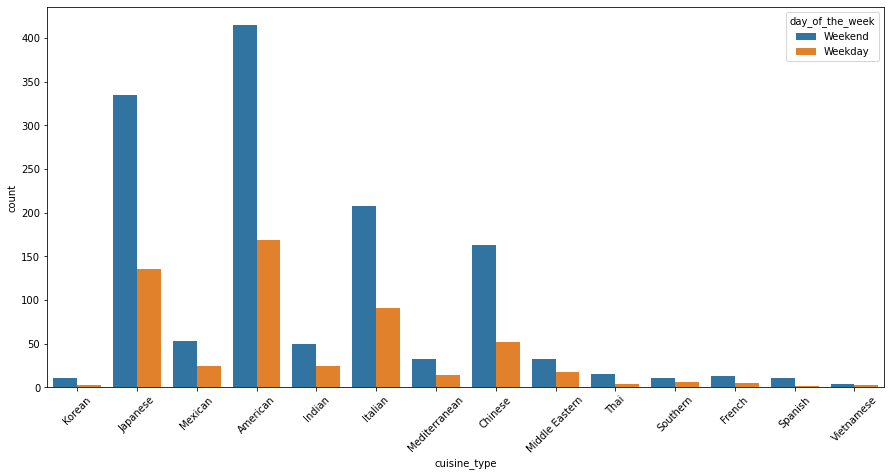

In [28]:
# This can also be done graphically
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='cuisine_type',hue='day_of_the_week');
plt.xticks(rotation = 45);

#### Observations:
The most popular cuisine ordered on weekends is American with 415 orders placed, followed by Japanese with 335 with Italian and Chinese menu taking the 3rd and 4th place with 207 and 163 orders respectively. Incidentally, the prefered cuisines on weekdays also follows the same order

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [29]:
count=0
# find the number of rows where cost_of_the_order is greater than 20 dollars
for i in range(df.shape[0]):   # df.shape[0] is the number of rows in the dataframe
    if df.cost_of_the_order[i]>20:
        count=count+1
    else:
        count=count 
pct_20=(count/df.shape[0])*100
print(pct_20,'%')
print(count, 'of the orders placed cost more than 20 dollars')
print('This is about',round(pct_20, 2),'percent of the total orders placed')

29.24130663856691 %
555 of the orders placed cost more than 20 dollars
This is about 29.24 percent of the total orders placed


#### Observations:
Out of a total of 1898 orders placed and delivered, 555 of these orders cost more than 20 dollars. This is about 29.24 percent of the total orders placed and delivered.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [30]:
# Find the total time taken to deliver the order (from when the order was placed, to when it is delivered
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
mdt=df.total_delivery_time.mean()
print('The mean delivery time for orders is',round(mdt,2),'minutes')

The mean delivery time for orders is 51.53 minutes


#### Observations:
By order delivery time, I take this to mean the time that will elapse between the customer placing an order and the food being delivered to the customer. 
The delivery time for orders placed is 51.53 minutes on the average

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [31]:
# Customer ids of the top 3 customers and amount of orders placed
df.customer_id.value_counts().iloc[:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top 3 customers with the highest number of orders placed are customers with: customer_id: 52832 with 13 orders customer_id: 47440 with 10 orders and customer_id: 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


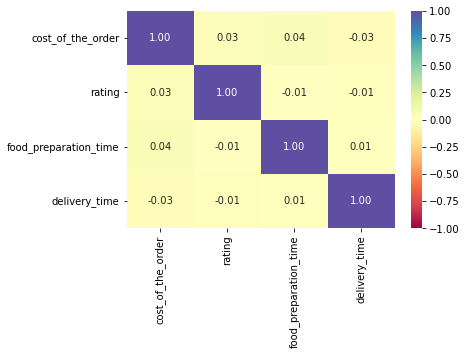

In [32]:
num_var=['cost_of_the_order','rating','food_preparation_time','delivery_time']
sns.heatmap(df[num_var].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

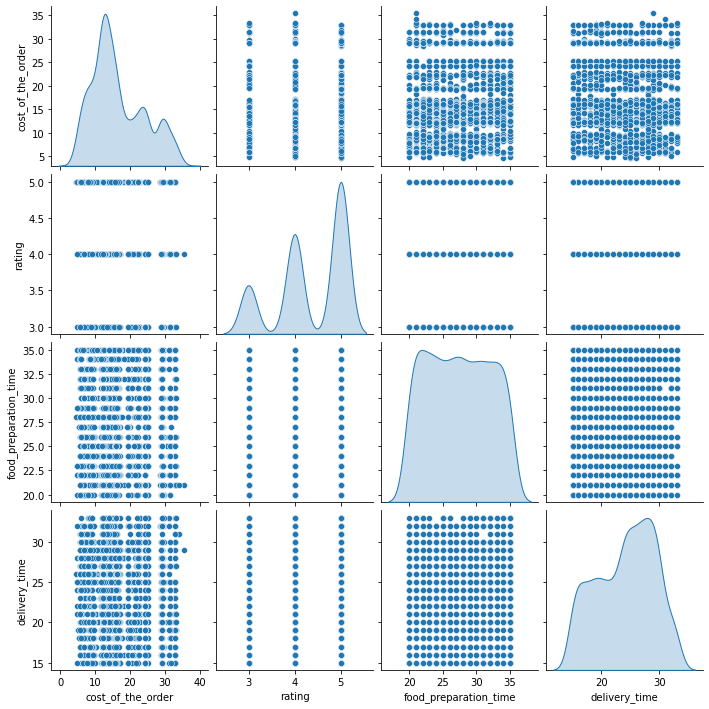

In [33]:
sns.pairplot(data=df[num_var], diag_kind="kde");

#### Observation:
I really cannot see any correllation whether positive or negative between any of the numeric variables from the heatmap and the pairplot displayed above.

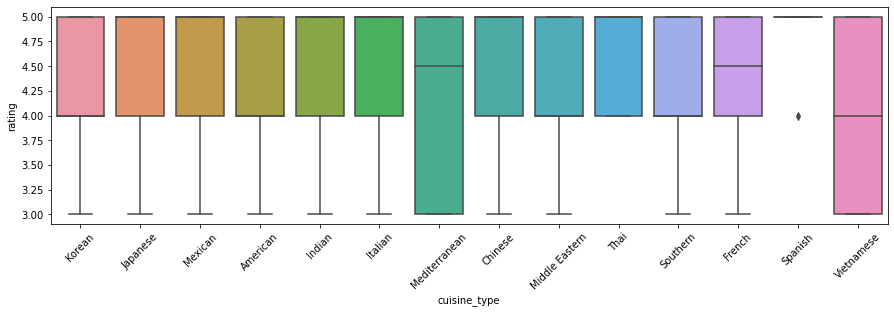

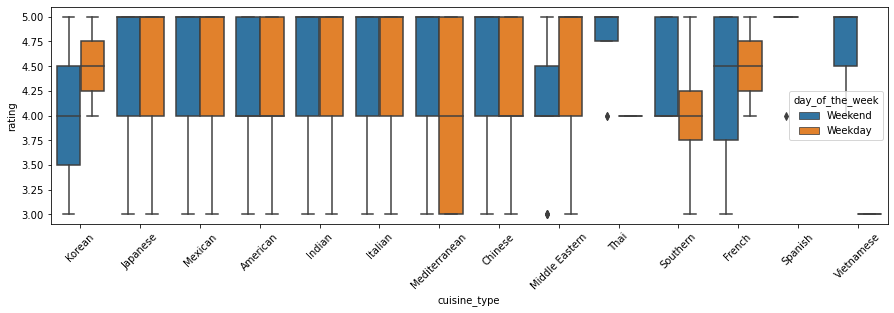

In [34]:
plt.figure(figsize=(15,4)) 
sns.boxplot(data=df, x='cuisine_type', y='rating')
plt.xticks(rotation=45);
plt.show()
plt.figure(figsize=(15,4)) 
sns.boxplot(data=df, x='cuisine_type', y='rating',hue='day_of_the_week')
plt.xticks(rotation=45);
plt.show()

#### Observation:
The rating accross all cuisine types is similar, whether the rating is being done on weekdays, or on weekends except for a few abberations like Korean, mediterranian, southern and french cuisines that receives dissimilar rationgs on weekdays and weekends.

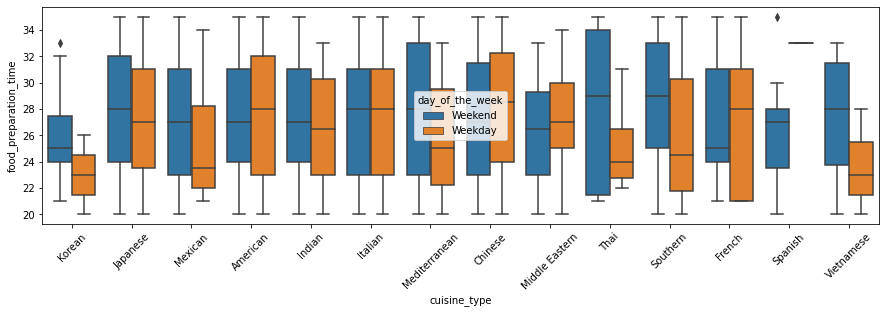

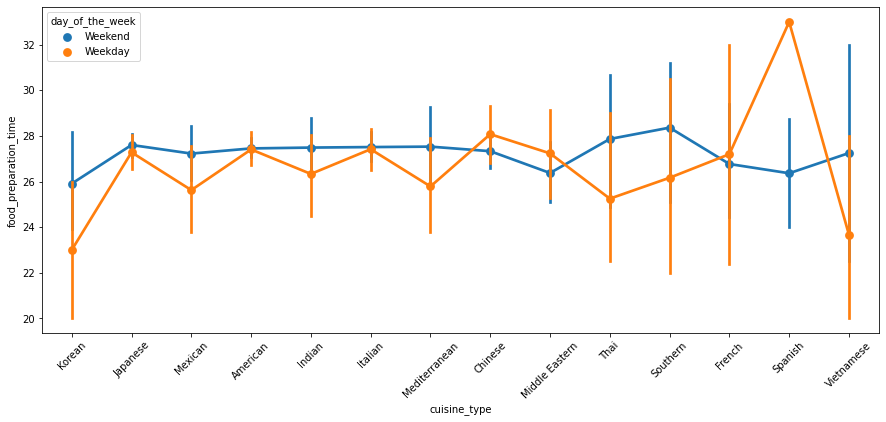

In [35]:
plt.figure(figsize=(15,4)) 
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time',hue='day_of_the_week')
plt.xticks(rotation=45);
plt.show()
plt.figure(figsize=(15,6))
sns.pointplot(data=df, x='cuisine_type', y='food_preparation_time', hue='day_of_the_week')
plt.xticks(rotation=45);
plt.show()

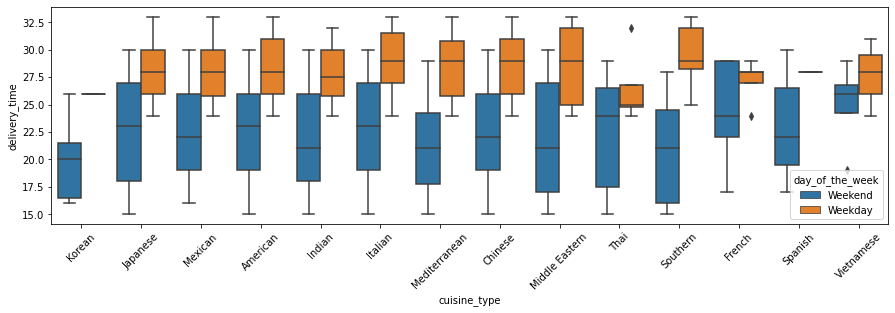

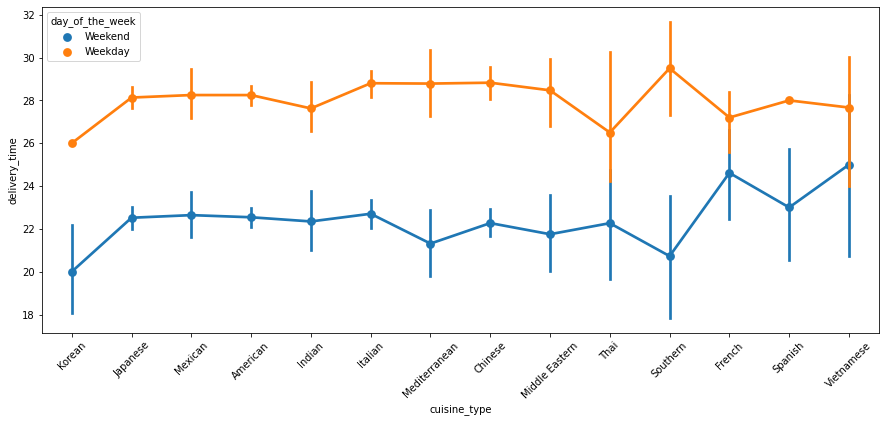

In [36]:
plt.figure(figsize=(15,4)) 
sns.boxplot(data=df, x='cuisine_type', y='delivery_time',hue='day_of_the_week')
plt.xticks(rotation=45);
plt.show()
plt.figure(figsize=(15,6))
sns.pointplot(data=df, x='cuisine_type', y='delivery_time', hue='day_of_the_week')
plt.xticks(rotation=45);
plt.show()

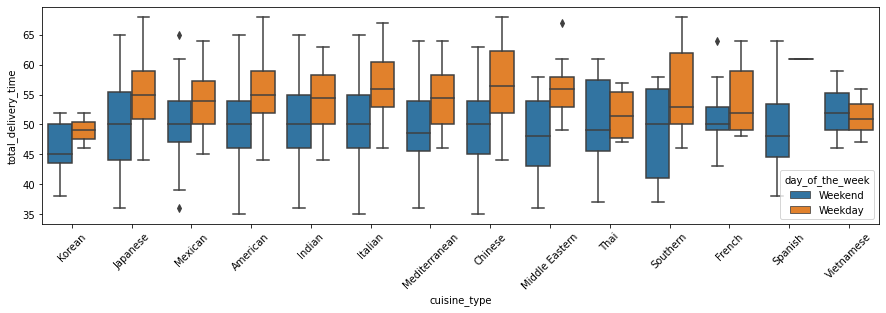

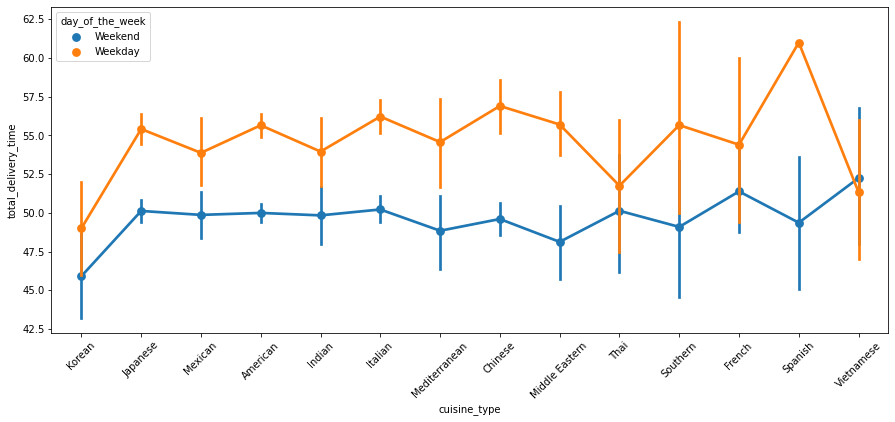

In [37]:
plt.figure(figsize=(15,4)) 
sns.boxplot(data=df, x='cuisine_type', y='total_delivery_time',hue='day_of_the_week')
plt.xticks(rotation=45);
plt.show()
plt.figure(figsize=(15,6))
sns.pointplot(data=df, x='cuisine_type', y='total_delivery_time', hue='day_of_the_week')
plt.xticks(rotation=45);
plt.show()

In [38]:
# Number of orders placed on weekdays and weekends
df.day_of_the_week.value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

#### Observation
* preparing each cuisine type takes almost the same amount of time whether done on weekdays or weekends. One would have expect preparation time to be longer on weekends due to the volume of orders (over 70% of orders are placed on weekeend), but this is not so.
* It takes longer on the average to deliver orders placed on weekdays than those placed on weekends. This is to be expected because there is always the likelihood of traffic being lighter on weekends

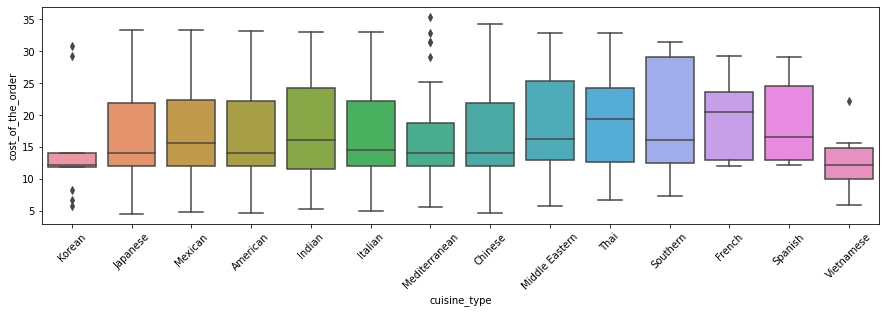

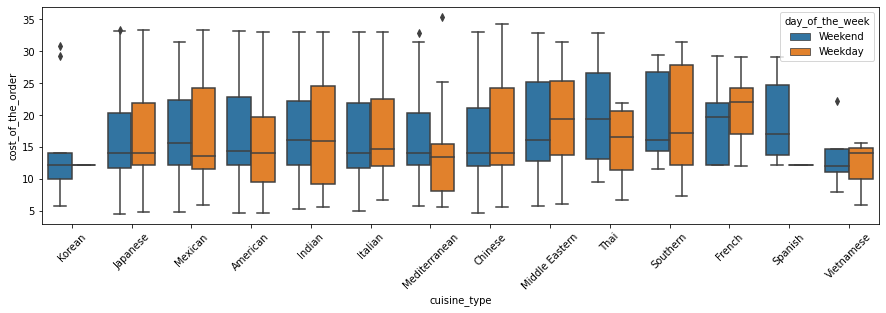

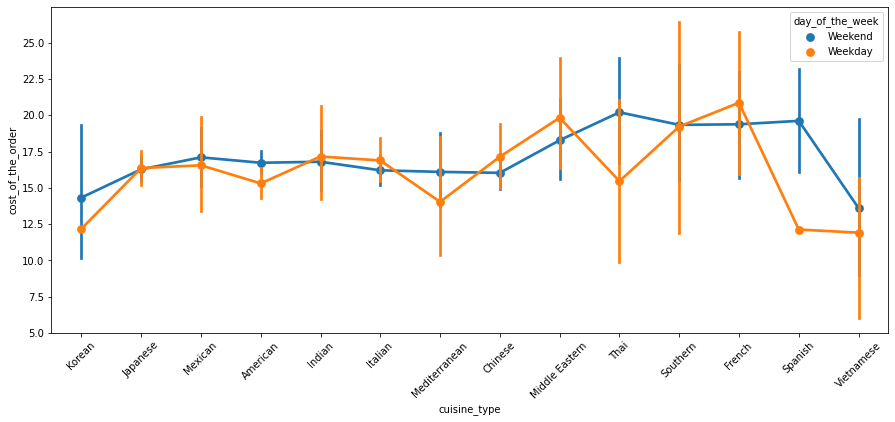

In [39]:
plt.figure(figsize=(15,4)) 
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=45);
plt.show()
plt.figure(figsize=(15,4)) 
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order',hue='day_of_the_week')
plt.xticks(rotation=45);
plt.show()
plt.figure(figsize=(15,6))
sns.pointplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week')
plt.xticks(rotation=45);
plt.show()

#### Observation:
* Most customers tend to buy less expensive meals irrespective of the cuisine type

* The exception to the above are French and Thai cuisines where more of those who patronised them tend to order the more expensive meals.   
These two insights could be deduced from the skewness of the plots for the differentb cuisine types.

* The average cost of food differs on weekends from what its average on weekdays. The exception to this are Japanese,Indian and southern cuisine types where the average prices are the same or almost the same on weekdays and weekends. Italian, Chinese, middle eastern, and French cuisines are on the average more expensive on weekdays than on weekends, wheras the reverse is the case for Korean, Mexican, american, Mediterranian, Thai, Spanish amnd Vietnamese cuisines

In [40]:
df2=df.cuisine_type.value_counts().reset_index()
df2 = df2.rename(columns={'index': 'cuisine_type','cuisine_type':'no_of_orders'})
df2

cuisine_type  no_of_orders
0         American           584
1         Japanese           470
2          Italian           298
3          Chinese           215
4          Mexican            77
5           Indian            73
6   Middle Eastern            49
7    Mediterranean            46
8             Thai            19
9           French            18
10        Southern            17
11          Korean            13
12         Spanish            12
13      Vietnamese             7

In [41]:
df3 = df.groupby(['cuisine_type'])['cost_of_the_order'].mean().reset_index()
df3 = df3.rename(columns={'cost_of_the_order': 'ave_cost_of_each_order'})
df3

cuisine_type  ave_cost_of_each_order
0         American                   16.32
1          Chinese                   16.31
2           French                   19.79
3           Indian                   16.92
4          Italian                   16.42
5         Japanese                   16.30
6           Korean                   14.00
7    Mediterranean                   15.47
8          Mexican                   16.93
9   Middle Eastern                   18.82
10        Southern                   19.30
11         Spanish                   18.99
12            Thai                   19.21
13      Vietnamese                   12.88

In [42]:
df4 = df.groupby(['cuisine_type'])['cost_of_the_order'].sum().reset_index()
df4 = df4.rename(columns={'cost_of_the_order': 'total_cost_of_all_orders'})
df4

cuisine_type  total_cost_of_all_orders
0         American                   9530.78
1          Chinese                   3505.62
2           French                    356.29
3           Indian                   1235.14
4          Italian                   4892.77
5         Japanese                   7663.13
6           Korean                    182.02
7    Mediterranean                    711.84
8          Mexican                   1303.85
9   Middle Eastern                    922.21
10        Southern                    328.11
11         Spanish                    227.93
12            Thai                    364.95
13      Vietnamese                     90.18

In [43]:
df5 = df.groupby(['cuisine_type'])['rating'].mean().reset_index()
df5 = df5.rename(columns={'rating': 'ave_rating'})
df5

cuisine_type  ave_rating
0         American        4.30
1          Chinese        4.34
2           French        4.30
3           Indian        4.54
4          Italian        4.36
5         Japanese        4.37
6           Korean        4.11
7    Mediterranean        4.22
8          Mexican        4.42
9   Middle Eastern        4.24
10        Southern        4.31
11         Spanish        4.83
12            Thai        4.67
13      Vietnamese        4.00

In [44]:
df6=pd.merge(df2, df3, on='cuisine_type')
df7=pd.merge(df4, df5, on='cuisine_type')

df_cuisine=pd.merge(df6, df7, on='cuisine_type')
df_cuisine

cuisine_type  no_of_orders  ave_cost_of_each_order  \
0         American           584                   16.32   
1         Japanese           470                   16.30   
2          Italian           298                   16.42   
3          Chinese           215                   16.31   
4          Mexican            77                   16.93   
5           Indian            73                   16.92   
6   Middle Eastern            49                   18.82   
7    Mediterranean            46                   15.47   
8             Thai            19                   19.21   
9           French            18                   19.79   
10        Southern            17                   19.30   
11          Korean            13                   14.00   
12         Spanish            12                   18.99   
13      Vietnamese             7                   12.88   

    total_cost_of_all_orders  ave_rating  
0                    9530.78        4.30  
1                    7663.13        4.37  
2                    4892.77        4.36  
3                    3505.62        4.34  
4                    1303.85        4.42  
5                    1235.14        4.54  
6                     922.21        4.24  
7                     711.84        4.22  
8                     364.95        4.67  
9                     356.29        4.30  
10                    328.11        4.31  
11                    182.02        4.11  
12                    227.93        4.83  
13                     90.18        4.00

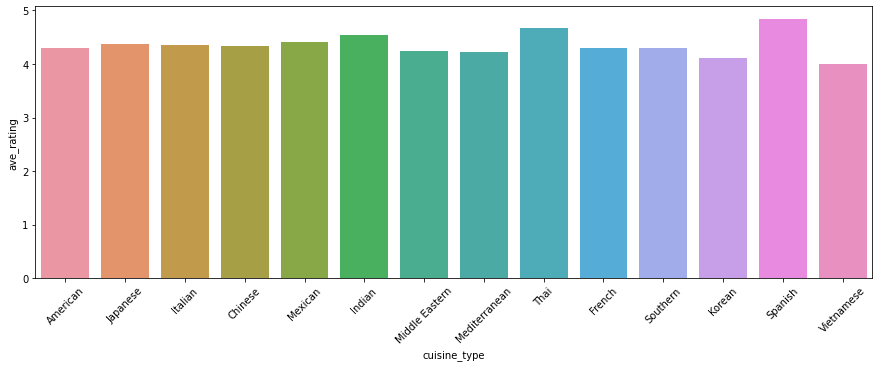

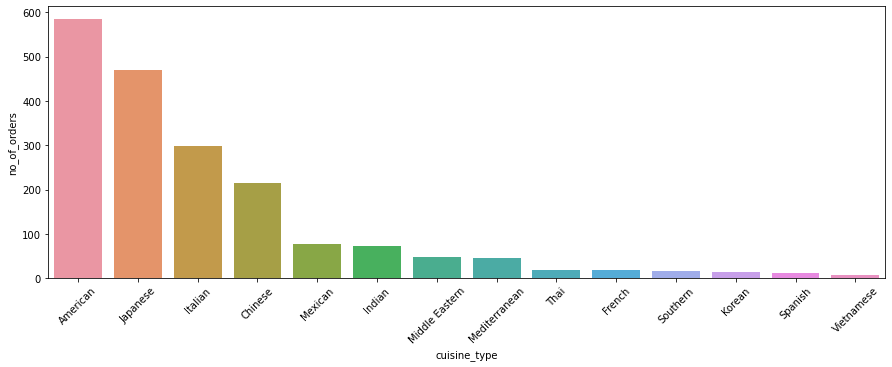

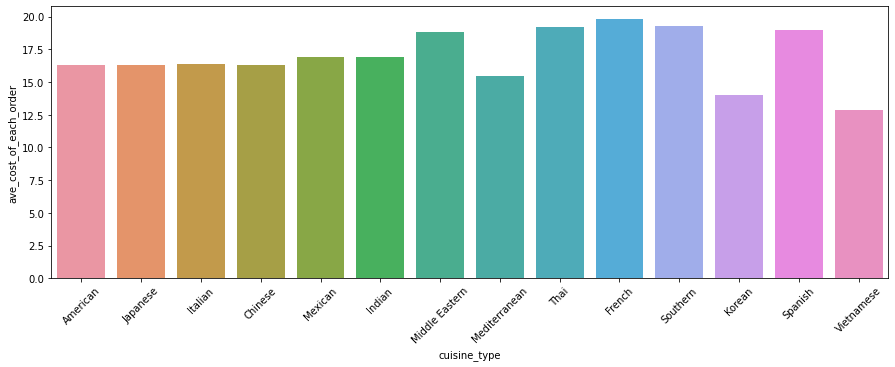

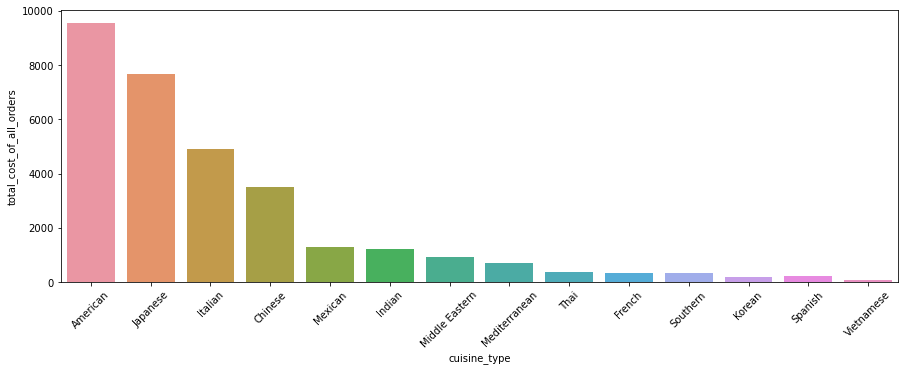

In [45]:
plt.figure(figsize=(15,5)) 
sns.barplot(data=df_cuisine, x='cuisine_type', y='ave_rating')
plt.xticks(rotation=45);
plt.show()
plt.figure(figsize=(15,5)) 
sns.barplot(data=df_cuisine, x='cuisine_type', y='no_of_orders')
plt.xticks(rotation=45);
plt.show()
plt.figure(figsize=(15,5)) 
sns.barplot(data=df_cuisine, x='cuisine_type', y='ave_cost_of_each_order')
plt.xticks(rotation=45);
plt.show()
plt.figure(figsize=(15,5)) 
sns.barplot(data=df_cuisine, x='cuisine_type', y='total_cost_of_all_orders')
plt.xticks(rotation=45);
plt.show()

In [46]:
# Total amount in dollars generated from selling all cuisine types
round(df_cuisine.total_cost_of_all_orders.sum(),2)

31314.82

In [47]:
# Amount in dollars made from selling the 4 topmost cuisine types
round(df_cuisine.total_cost_of_all_orders.head(4).sum(),2)

25592.3

#### Observation:
* American cuisines generate the highest income for all the restaurants at almost 10,000 dollars. This is followed by Japanese cuisines at almost 7,500 dollars and italian and Chinese cuisines at almost 5,000 and 3,500 dollars respectively. bringing up the rear are Vietnamese, Korean and Spanish cuisines at 90, 180 and 230 dollars respectively. This trend is comparable to the number of orders received for each cuisine type.

* 4 out of the total 14 cuisine type dealt with (28.57%) are responsible for 1597 out of the total 1898 (82.56%) orders placed (20/80 rule?).

* On the average, Middle Eastern, Thai, French, Southern and Spanish cuisines cost more than the other type of cuisines.

* Spanish cuisine has the highest average rating of all the cuisine types followed by Thai and indian cuisines respectively.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [48]:
# Filter out the rated restaurants as those with nonnull rating entries 
df_rated_restaurants = df[df.rating.notnull()].copy()
df_rated_restaurants['rating'] = df_rated_restaurants['rating'].astype('Int64')
df_rated_restaurants.head()

order_id  customer_id            restaurant_name   cuisine_type  \
2   1477070        66393                Cafe Habana        Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken       American   
4   1478249        76942           Dirty Bird to Go       American   
5   1477224       147468           Tamarind TriBeCa         Indian   
7   1477859        89574                  Barbounia  Mediterranean   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
2              12.23         Weekday       5                     23   
3              29.20         Weekend       3                     25   
4              11.59         Weekday       4                     25   
5              25.22         Weekday       3                     20   
7               5.97         Weekday       3                     33   

   delivery_time  total_delivery_time  
2             28                   51  
3             15                   40  
4             24                   49  
5             24                   44  
7             30                   63

In [49]:
df_rated_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   Int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
 9   total_delivery_time    1162 non-null   int64  
dtypes: Int64(1), float64(1), int64(5), object(3)
memory usage: 101.0+ KB


In [50]:
# Find the number of times each of the rated restaurants(RR) are rated
df_RR_rating_count=df_rated_restaurants.groupby(['restaurant_name'])['rating'].count().reset_index()
df_RR_rating_count = df_RR_rating_count.rename(columns={'rating': 'rating_count'})
df_RR_rating_count

restaurant_name  rating_count
0          'wichcraft             1
1           12 Chairs             2
2     5 Napkin Burger             2
3           67 Burger             1
4                Amma             2
..                ...           ...
151    Zero Otto Nove             1
152              brgr             1
153        da Umberto             1
154  ilili Restaurant            13
155         indikitch             2

[156 rows x 2 columns]

In [51]:
# create a new column called 'ave-rating' in the df_RR_rating_count dataframe
df_RR_rating_count['ave_rating']=0
df_RR_rating_count

restaurant_name  rating_count  ave_rating
0          'wichcraft             1           0
1           12 Chairs             2           0
2     5 Napkin Burger             2           0
3           67 Burger             1           0
4                Amma             2           0
..                ...           ...         ...
151    Zero Otto Nove             1           0
152              brgr             1           0
153        da Umberto             1           0
154  ilili Restaurant            13           0
155         indikitch             2           0

[156 rows x 3 columns]

In [52]:
# Find the sum af all the ratings for each rated restaurant
df_RR_rating_sum=df_rated_restaurants.groupby(['restaurant_name'])['rating'].sum().reset_index()
df_RR_rating_sum = df_RR_rating_sum.rename(columns={'rating': 'rating_sum'})
df_RR_rating_sum

restaurant_name  rating_sum
0          'wichcraft           5
1           12 Chairs           9
2     5 Napkin Burger           8
3           67 Burger           5
4                Amma           9
..                ...         ...
151    Zero Otto Nove           4
152              brgr           3
153        da Umberto           5
154  ilili Restaurant          54
155         indikitch           9

[156 rows x 2 columns]

In [53]:
# Find the restaurants that meets the criteria for the promotional offer
for i in range(df_RR_rating_count.shape[0]):  # No of rows in the dataframe
    ave_rating=df_RR_rating_sum.rating_sum[i]/df_RR_rating_count.rating_count[i] # Average rating for each rated restaurant
    if df_RR_rating_count.rating_count[i]>50 and ave_rating>4:
        df_RR_rating_count.ave_rating[i]=round(ave_rating,2)
    else:
        df_RR_rating_count.drop([i], axis=0, inplace=True)   # Drop any restaurant that does not meet the criteria from the dataframe.
df_RR_rating_count 

restaurant_name  rating_count  ave_rating
16   Blue Ribbon Fried Chicken            64        4.33
17           Blue Ribbon Sushi            73        4.22
117                Shake Shack           133        4.28
132          The Meatball Shop            84        4.51

#### Observations:
* Only 4 out of the 178 restaurants qualify for the promotional offer. These are:

* Blue Ribbon Fried Chicken with a rating count of 64 and an average rating of 4.33

* Blue Ribbon Sushi with a rating count of	73 and an average rating of 4.22

* Shake Shack with a rating count of 133 and an average rating of 4.28

* The Meatball Shop with a rating count of 84 and an average rating of 4.51

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [54]:
# Calculate the revenue generated across all orders
df["revenue"]=0     # Create a new column in the dataframe, initilize it to 0
for i in range(df.shape[0]):   # df.shape[0] is the number of rows in the dataframe
    if df.cost_of_the_order[i]>20:
        df.revenue[i]=df.cost_of_the_order[i]*0.25
    elif df.cost_of_the_order[i]>5:
        df.revenue[i]=df.cost_of_the_order[i]*0.15
    else:
        df.revenue[i]=0
rev_tot=df.revenue.sum()
print('Total revenue is', round(rev_tot, 2), 'dollars')

Total revenue is 6166.3 dollars


#### Observations:
Total revenue generated by the company across all orders is 6166.30 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [55]:
# find the number of rows where total delivery time is greater than 60 minutes
count=0
for i in range(df.shape[0]):   # df.shape[0] is the number of rows in the dataframe
    if df.total_delivery_time[i]>60:
        count=count+1
    else:
        count=count 
pct_60=(count/df.shape[0])*100
print(round(pct_60,2),'%')
print(count, 'of the orders placed take more than 60 minutes to deliver')
print('This is about',round(pct_60,2),'percent of the total orders placed')

10.54 %
200 of the orders placed take more than 60 minutes to deliver
This is about 10.54 percent of the total orders placed


#### Observations:
200 out of the total 1898 food order in the dataset took more than 60 minutes to deliver from the time the order was placed to the time the food was delivered. This is about 10.54 percent of the total orders placed and delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [56]:
# Create a new dataframe for food deliveries made on weekdays.
df_weekdays=df[df['day_of_the_week'] == 'Weekday']
ave_wkdy_dt=df_weekdays.delivery_time.mean()
ave_wkdy_tdt=df_weekdays.total_delivery_time.mean()

# Create a new dataframe for food deliveries made on weekends.
df_weekends=df[df['day_of_the_week'] == 'Weekend']
ave_wkend_dt=df_weekends.delivery_time.mean()
ave_wkend_tdt=df_weekends.total_delivery_time.mean()

print(df_weekdays.shape[0], 'deliveries were made on weekdays')
print('Whereas', df_weekends.shape[0], 'deliveries were made on weekends')

print('The average delivery time (after food preparation) on weekdays is', round(ave_wkdy_dt,2),'minutes')
print('Whereas the average delivery time (after food preparation) on weekends is', round(ave_wkend_dt,2),'minutes')

print('The average delivery time (from order placement to delivery) on weekdays is', round(ave_wkdy_tdt,2),'minutes')
print('Whereas the average delivery time (from order placement to delivery) on weekends is', round(ave_wkend_tdt,2),'minutes')


547 deliveries were made on weekdays
Whereas 1351 deliveries were made on weekends
The average delivery time (after food preparation) on weekdays is 28.34 minutes
Whereas the average delivery time (after food preparation) on weekends is 22.47 minutes
The average delivery time (from order placement to delivery) on weekdays is 55.55 minutes
Whereas the average delivery time (from order placement to delivery) on weekends is 49.91 minutes


#### Observations:
Even though there were two and a half times more orders/deliveries made on weekends than weekdays, average food delivery time on weekends is almost 6 minutes faster than what we have on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [57]:
df_cuisine

cuisine_type  no_of_orders  ave_cost_of_each_order  \
0         American           584                   16.32   
1         Japanese           470                   16.30   
2          Italian           298                   16.42   
3          Chinese           215                   16.31   
4          Mexican            77                   16.93   
5           Indian            73                   16.92   
6   Middle Eastern            49                   18.82   
7    Mediterranean            46                   15.47   
8             Thai            19                   19.21   
9           French            18                   19.79   
10        Southern            17                   19.30   
11          Korean            13                   14.00   
12         Spanish            12                   18.99   
13      Vietnamese             7                   12.88   

    total_cost_of_all_orders  ave_rating  
0                    9530.78        4.30  
1                    7663.13        4.37  
2                    4892.77        4.36  
3                    3505.62        4.34  
4                    1303.85        4.42  
5                    1235.14        4.54  
6                     922.21        4.24  
7                     711.84        4.22  
8                     364.95        4.67  
9                     356.29        4.30  
10                    328.11        4.31  
11                    182.02        4.11  
12                    227.93        4.83  
13                     90.18        4.00

In [58]:
df_rest_count=df.restaurant_name.value_counts().reset_index()
df_rest_count= df_rest_count.rename(columns={'index': 'restaurant_name','restaurant_name':'no_of_orders'})

df_rev_mean=df.groupby(['restaurant_name'])['revenue'].mean().sort_values(ascending = False).reset_index()
df_rev_mean = df_rev_mean.rename(columns={'revenue': 'average_rev_per_order'})

df_rev_sum=df.groupby(['restaurant_name'])['revenue'].sum().sort_values(ascending = False).reset_index()
df_rev_sum = df_rev_sum.rename(columns={'revenue': 'total_revenue_generated'})

df_revenue=pd.merge(df_rest_count, (pd.merge(df_rev_sum, df_rev_mean, on='restaurant_name')), on='restaurant_name')
df_revenue

restaurant_name  no_of_orders  total_revenue_generated  \
0                  Shake Shack           219                   703.61   
1            The Meatball Shop           132                   419.83   
2            Blue Ribbon Sushi           119                   360.46   
3    Blue Ribbon Fried Chicken            96                   340.20   
4                         Parm            68                   218.56   
..                         ...           ...                      ...   
173               Sushi Choshi             1                     2.06   
174           Dos Caminos Soho             1                     1.90   
175                  La Follia             1                     1.21   
176              Philippe Chow             1                     6.05   
177                 'wichcraft             1                     1.21   

     average_rev_per_order  
0                     3.21  
1                     3.18  
2                     3.03  
3                     3.54  
4                     3.21  
..                     ...  
173                   2.06  
174                   1.90  
175                   1.21  
176                   6.05  
177                   1.21  

[178 rows x 4 columns]

In [59]:
pix = px.bar(df_revenue, x="restaurant_name", y="no_of_orders")
pix.show() 
pix = px.bar(df_revenue, x="restaurant_name", y="total_revenue_generated")
pix.show() 
pix = px.bar(df_revenue, x="restaurant_name", y="average_rev_per_order")
pix.show() 

In [60]:
# No of restaurants catering for only 1 order
df_revenue.loc[df_revenue['no_of_orders']==1].shape[0]

50

In [61]:
# No of restaurants catering for only 2 orders
df_revenue.loc[df_revenue['no_of_orders']==2].shape[0]

23

In [62]:
# No of restaurants catering for only 1 or 2 orders, whose average revenue generated per order for Foodhub is $2 or less
df20=df_revenue.loc[df_revenue['no_of_orders']<=2]
df21=df20.loc[df20['average_rev_per_order']<=2]
df21

restaurant_name  no_of_orders  total_revenue_generated  \
108                 Zero Otto Nove             2                     2.71   
110                           brgr             2                     2.97   
113                   Olive Garden             2                     3.43   
117                  Bukhara Grill             2                     3.56   
119                         Haandi             2                     2.82   
125           Xe May Sandwich Shop             2                     3.30   
127                     Mira Sushi             2                     3.73   
131               Frank Restaurant             1                     1.81   
132                 Hiroko's Place             1                     1.96   
133                      Rye House             1                     1.82   
134                  Lamarca Pasta             1                     1.38   
138            Hampton Chutney Co.             1                     1.86   
139                        Wa Jeal             1                     1.01   
140                    Hunan Manor             1                     0.86   
144                   Market Table             1                     1.02   
147                 Coppola's East             1                     1.96   
148        Kori Restaurant and Bar             1                     1.83   
149                       Woorijip             1                     1.24   
151                 The MasalaWala             1                     1.82   
153     Big Wong Restaurant _¤¾Ñ¼             1                     0.89   
159                   Samurai Mama             1                     1.75   
161                         Balade             1                     1.38   
166              Gaia Italian Cafe             1                     1.32   
167  Chola Eclectic Indian Cuisine             1                     1.31   
171                        Alidoro             1                     1.89   
172         Cipriani Le Specialita             1                     0.89   
174               Dos Caminos Soho             1                     1.90   
175                      La Follia             1                     1.21   
177                     'wichcraft             1                     1.21   

     average_rev_per_order  
108                   1.35  
110                   1.48  
113                   1.71  
117                   1.78  
119                   1.41  
125                   1.65  
127                   1.86  
131                   1.81  
132                   1.96  
133                   1.82  
134                   1.38  
138                   1.86  
139                   1.01  
140                   0.86  
144                   1.02  
147                   1.96  
148                   1.83  
149                   1.24  
151                   1.82  
153                   0.89  
159                   1.75  
161                   1.38  
166                   1.32  
167                   1.31  
171                   1.89  
172                   0.89  
174                   1.90  
175                   1.21  
177                   1.21

In [63]:
# Total revenue generated for Foodhub for servicing the restaurants above
df21.total_revenue_generated.sum()

54.807

In [64]:
# Number of restaurants with only 1 or 2 orders whose average generated revenue is $2 or less
df21.shape[0]

29

### Conclusions:
*  We have analyzed the dataset given by the foodhub company. It contains a total of 1898 rows and 9 columns.
the dataset does not contain any missing value except for the fact that almost 40 percent of the customers fail to rate the service being provided on receipt of their order.


* It is noteworthy to point out that no customer ever gave Foodhub services any rating lower than 3, which is the average rating on a scale of 1 to 5. In fact about 50% of the customers gave theservice being provided a rating of 5, while another 33 percent gave the services being provided a rating of 4.


* There are 178 restaurants in FoodHub's database. FoodHub provides its customers a choice of 14 different cuisine types on their database. The "go to" restaurant is Shake shack which caters for a disproportionate quantity (more than 11 percent) of the total orders placed and delivered. 


* It is also observed that American cuisines are the favoured dish of most of the customers with more than 30 percent of the orders being placed and delivered being for American type food. 


* More than 71 percent of the business done by FoodHub are done on weekends with weekday orders responsible for less than 29 percent of the services delivered.


* Despite the fact that a disproportionate volume of the orders catered for are done on weekends, food delivery is actually faster on weekends than on weekdays. from the analysis, it was discovered that food preparation takes approximately the same amount of time both on weekdays and weekends, but actual delivery after the food has been prepared is slower by about 6 minutes on weekdays. This is likely due to the fact that there is often more traffic on weekdays than on weekends.

### Recommendations:
* Delivery times are slower on weekdays than weekends. This is actually the time people may be pressed for time and the delay in delivery may actually be responsible for the lower volume of orders received on weekdays. Since there is little or nothing that we can do to overcome the constraint of heavier weekday traffic, we may want to see what could be done to speed up food preparation times on weekdays.


* A close perusal of the revenue dataset (df_revenue) shows that patronage of some of the restaurants are very low . 50 out of the 178 restaurants (about 28 percent) catered for just 1 order according to the dataset. Another 23 out of the 178 (almost 13 percent) catered for just two orders. There might be a need to prune the restaurant list on the App depending on the logistics of servicing each order. For example, if we spend 2 dollars to service each order, then it may be pointless having the 29 restaurants listed above on the App as the total revenue generated through them is not enough to support the logistics of fulfilling the orders emanating from them. 

---